<a href="https://colab.research.google.com/github/chaithanyai311/Artificial-Intelligence-mini-project/blob/main/CNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Use a Fashion MNIST Dataset and build a Fashion Image Classfier. Use a CNN model for building a Neural Network**

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
y_train.flatten()

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
import numpy as np
np.unique(y_train.flatten(),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
np.unique(y_test.flatten(),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


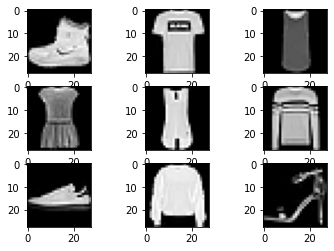

In [ ]:
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape,y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
label = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [ ]:
i = 2
trainY=trainY.astype('int8')
index = trainY[i][0]
label[index]

'trouser'

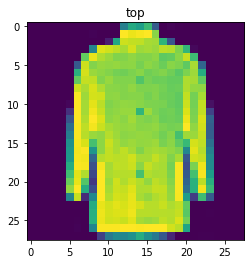

In [ ]:
i = 8345
index = trainY[i][0]
import matplotlib.pyplot as plt
plt.imshow(x_train[i])
plt.title(label[index])
plt.show()

In [ ]:
# Preprocessing - Normalization
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

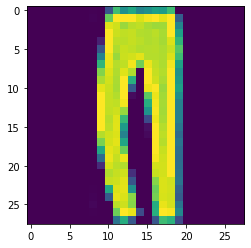

In [ ]:
plt.imshow(x_test[2])

In [ ]:
from keras.utils import np_utils
trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

In [ ]:
# Neural Network Architecture
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
classifier.add(MaxPooling2D())
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D())
classifier.add(Flatten())
classifier.add(Dense(units=512,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=10, activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [ ]:
history = classifier.fit(trainX, trainY, batch_size=128, epochs=20, verbose=2, validation_data=(testX, testY))

Epoch 1/20
469/469 - 49s - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 105ms/step
Epoch 2/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 104ms/step
Epoch 3/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 104ms/step
Epoch 4/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 105ms/step
Epoch 5/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 105ms/step
Epoch 6/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 105ms/step
Epoch 7/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 105ms/step
Epoch 8/20
469/469 - 49s - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000 - 49s/epoch - 105

In [ ]:
# Prediction
y_pred = classifier.predict(testX)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
x_pred = classifier.predict(testX)
x_pred

array([[0.099723  , 0.1005129 , 0.09988745, ..., 0.10068081, 0.10009882,
        0.09999577],
       [0.099723  , 0.1005129 , 0.09988745, ..., 0.10068081, 0.10009882,
        0.09999577],
       [0.099723  , 0.1005129 , 0.09988745, ..., 0.10068081, 0.10009882,
        0.09999577],
       ...,
       [0.099723  , 0.1005129 , 0.09988745, ..., 0.10068081, 0.10009882,
        0.09999577],
       [0.099723  , 0.1005129 , 0.09988745, ..., 0.10068081, 0.10009882,
        0.09999577],
       [0.099723  , 0.1005129 , 0.09988745, ..., 0.10068081, 0.10009882,
        0.09999577]], dtype=float32)

In [ ]:
y_pred[0]

3

In [ ]:
testY

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.1

Accuracy score is 0.1